<a href="https://colab.research.google.com/github/zh777by/DI-bootcamp/blob/main/Week_6/Day3/Mini_project1_d3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
df['sex'].fillna('Unknown', inplace=True)
df['bill_length_mm'].fillna('Unknown', inplace=True)
df['bill_depth_mm'].fillna('Unknown', inplace=True)
df['flipper_length_mm'].fillna('Unknown', inplace=True)
df['body_mass_g'].fillna('Unknown', inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
df.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


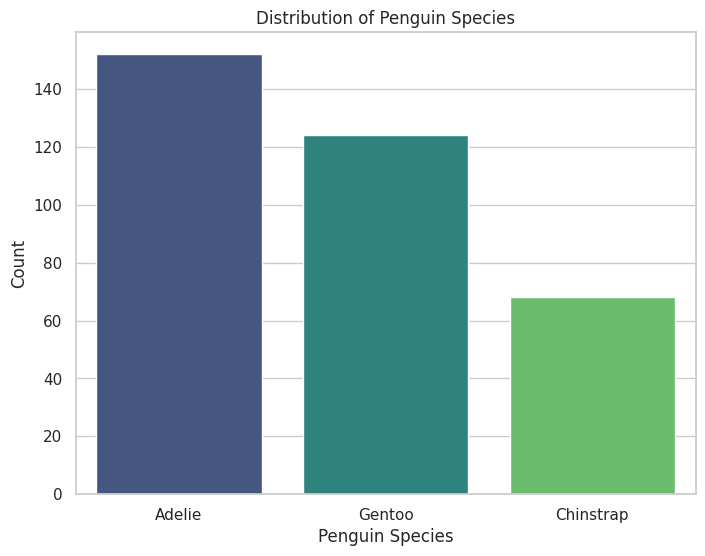

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df, palette='viridis')

plt.xlabel('Penguin Species')
plt.ylabel('Count')
plt.title('Distribution of Penguin Species')
plt.show()

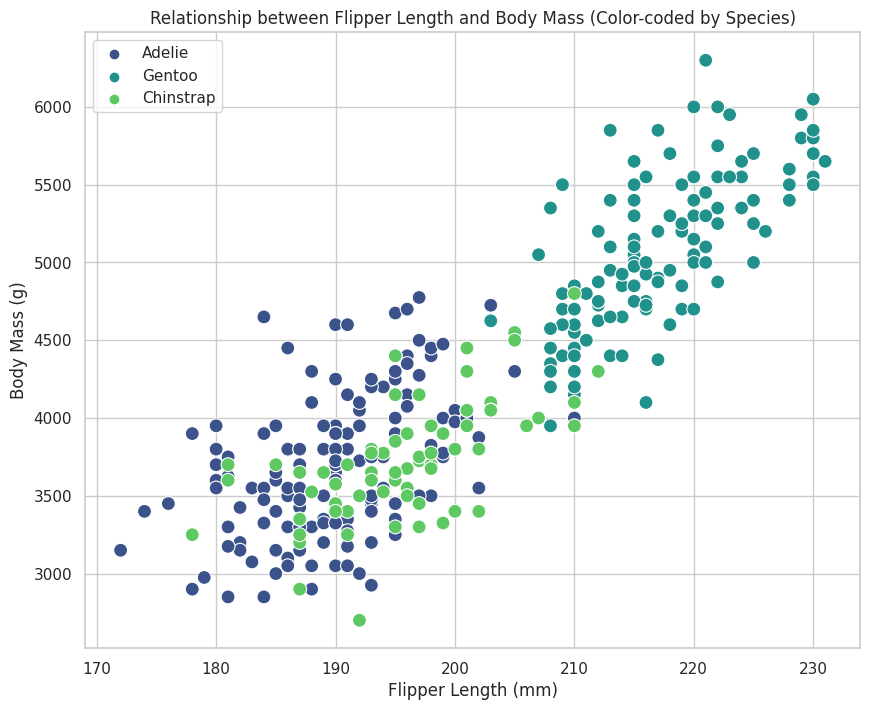

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df, palette='viridis', s=100)

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Relationship between Flipper Length and Body Mass (Color-coded by Species)')
plt.legend()
plt.show()

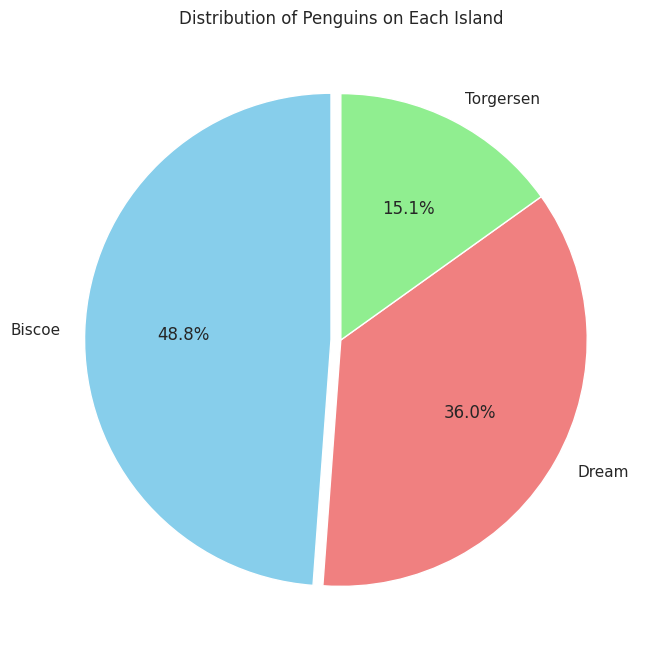

In [ ]:
island_counts = df['island'].value_counts()
explode = (0.04, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'], explode=explode)

plt.title('Distribution of Penguins on Each Island')
plt.show()

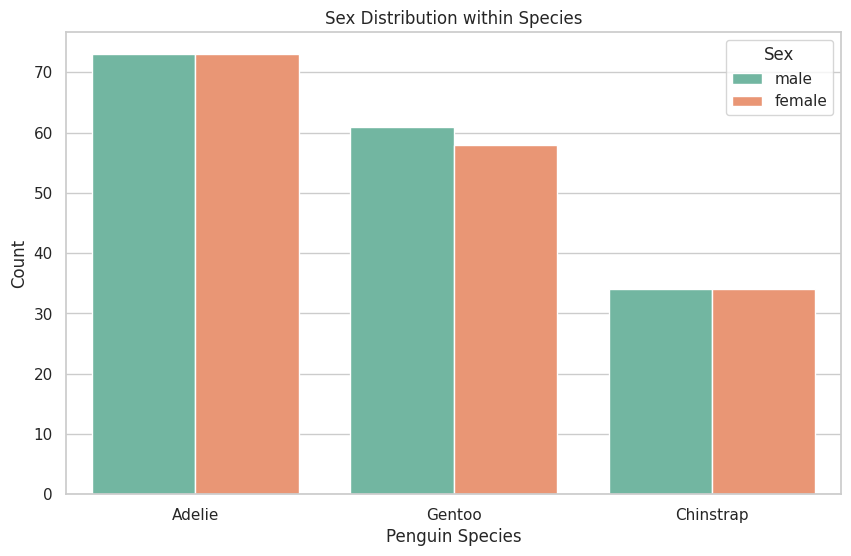

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='sex', data=df, palette='Set2')

plt.xlabel('Penguin Species')
plt.ylabel('Count')
plt.title('Sex Distribution within Species')
plt.legend(title='Sex')
plt.show()

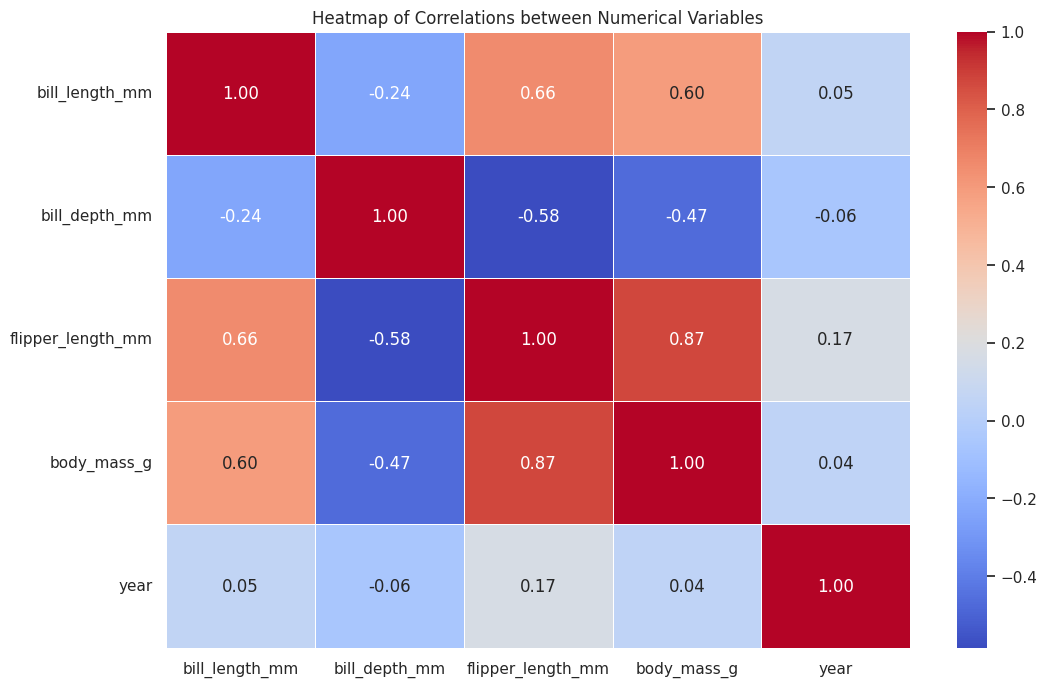

In [ ]:
numerical_columns = df.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap of Correlations between Numerical Variables')
plt.show()

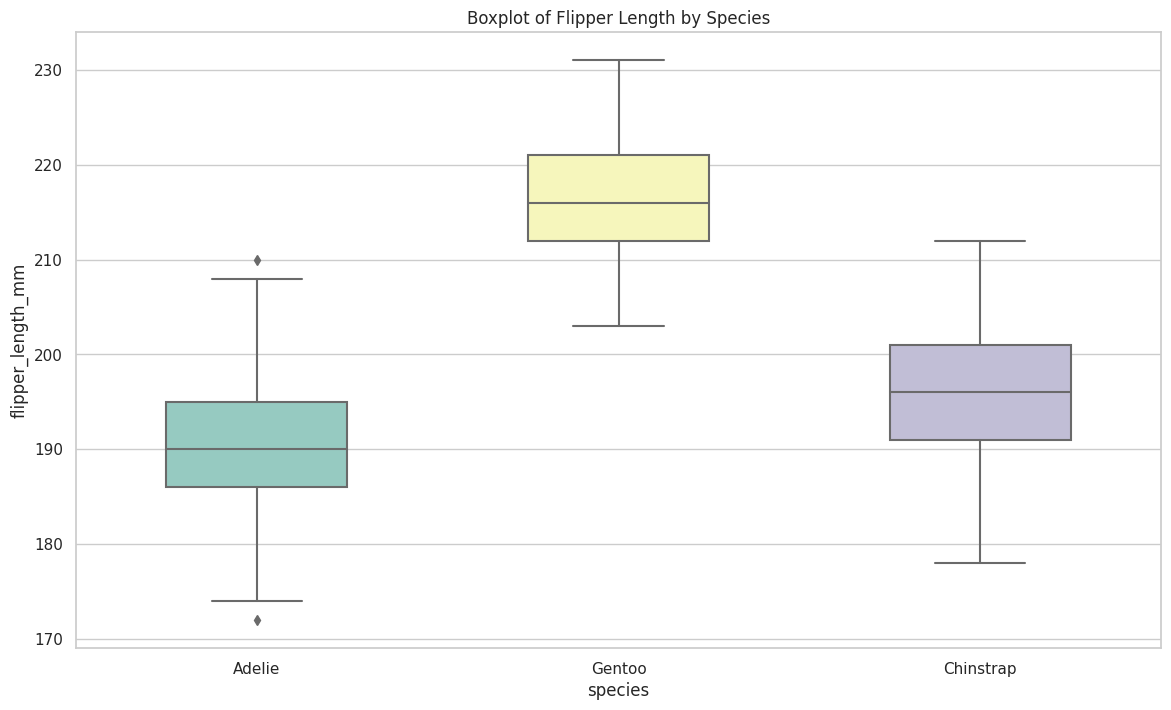

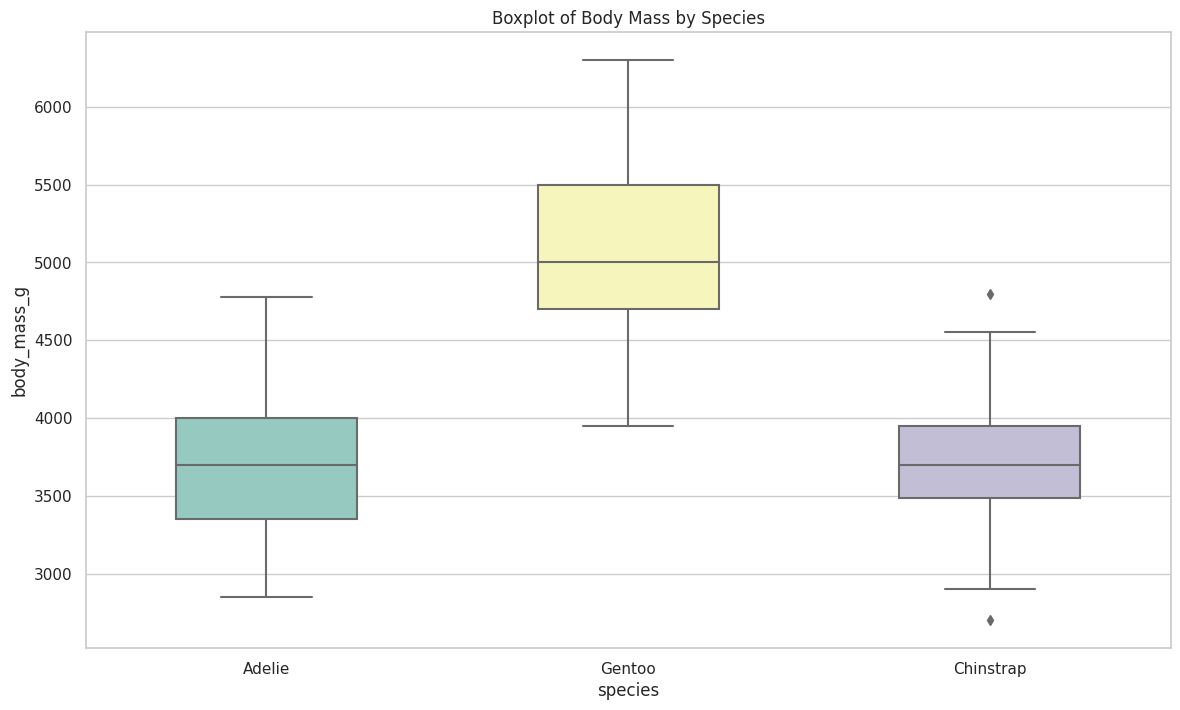

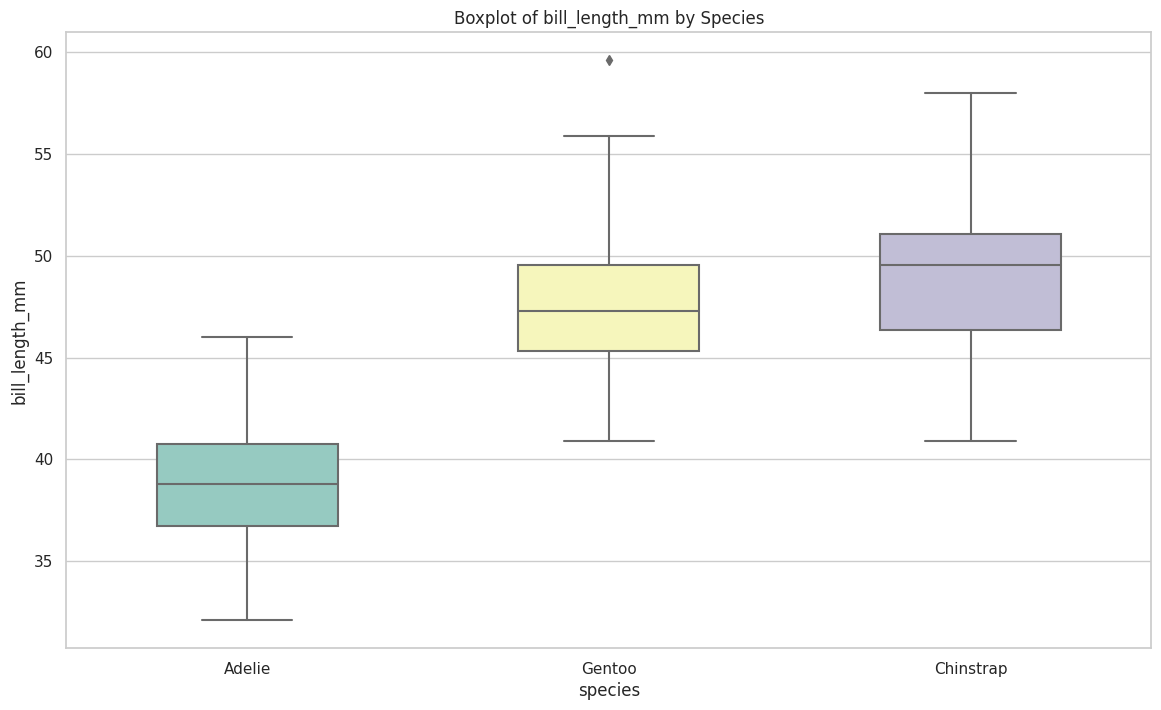

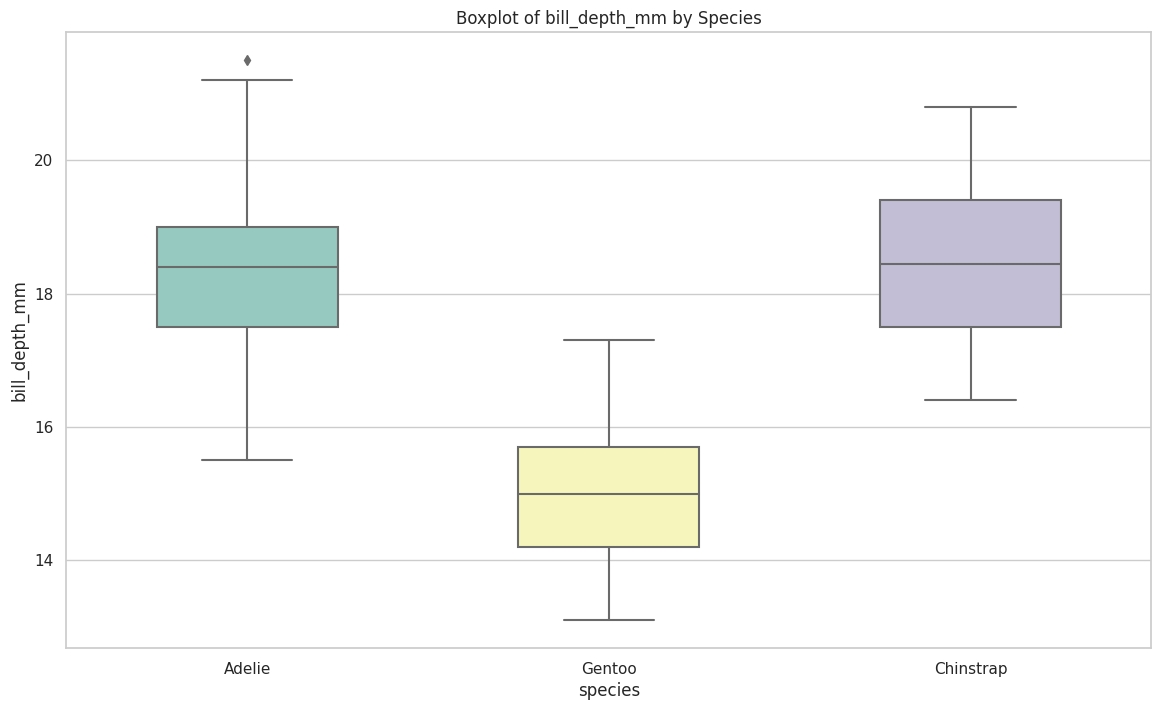

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.boxplot(x="species", y="flipper_length_mm", data=df, palette="Set3", width=0.5, linewidth=1.5)
plt.title('Boxplot of Flipper Length by Species')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x="species", y="body_mass_g", data=df, palette="Set3", width=0.5, linewidth=1.5)
plt.title('Boxplot of Body Mass by Species')
plt.show()

bill_measurements_columns = ['bill_length_mm', 'bill_depth_mm']
for column in bill_measurements_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x="species", y=column, data=df, palette="Set3", width=0.5, linewidth=1.5)
    plt.title(f'Boxplot of {column} by Species')
    plt.show()

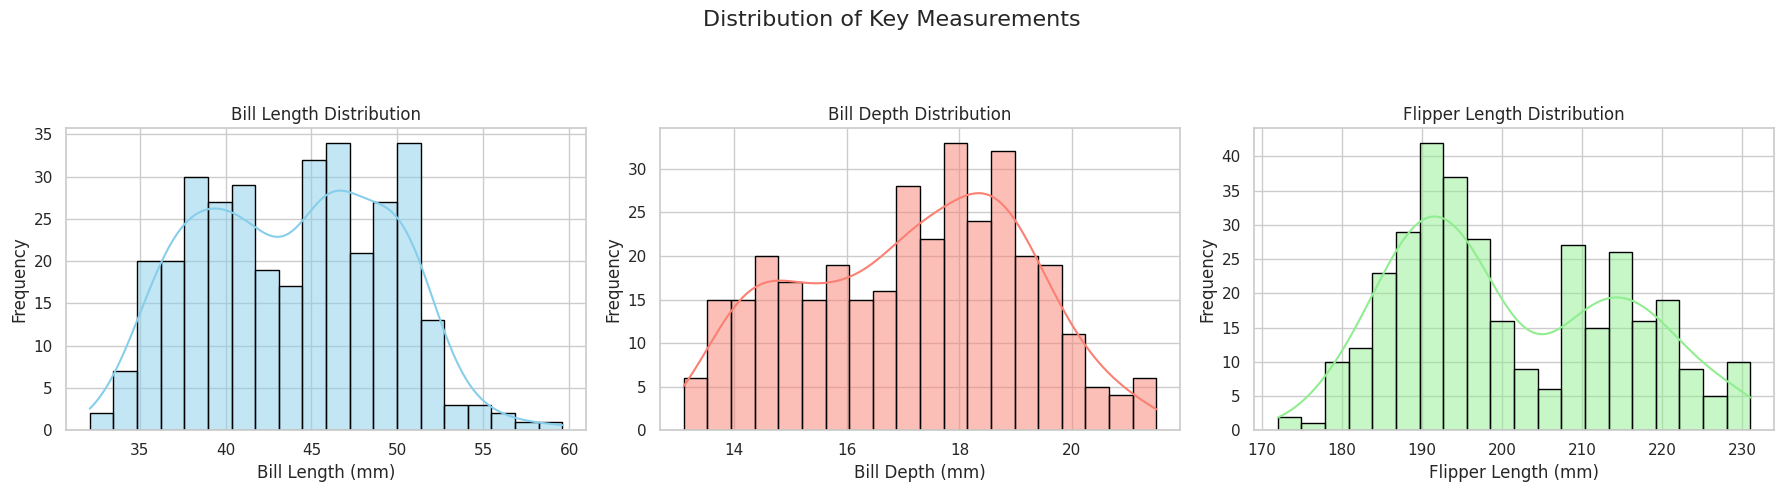

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Distribution of Key Measurements', fontsize=16)

sns.histplot(df['bill_length_mm'], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Bill Length Distribution')
axes[0].set_xlabel('Bill Length (mm)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['bill_depth_mm'], bins=20, kde=True, color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Bill Depth Distribution')
axes[1].set_xlabel('Bill Depth (mm)')
axes[1].set_ylabel('Frequency')

sns.histplot(df['flipper_length_mm'], bins=20, kde=True, color='lightgreen', edgecolor='black', ax=axes[2])
axes[2].set_title('Flipper Length Distribution')
axes[2].set_xlabel('Flipper Length (mm)')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

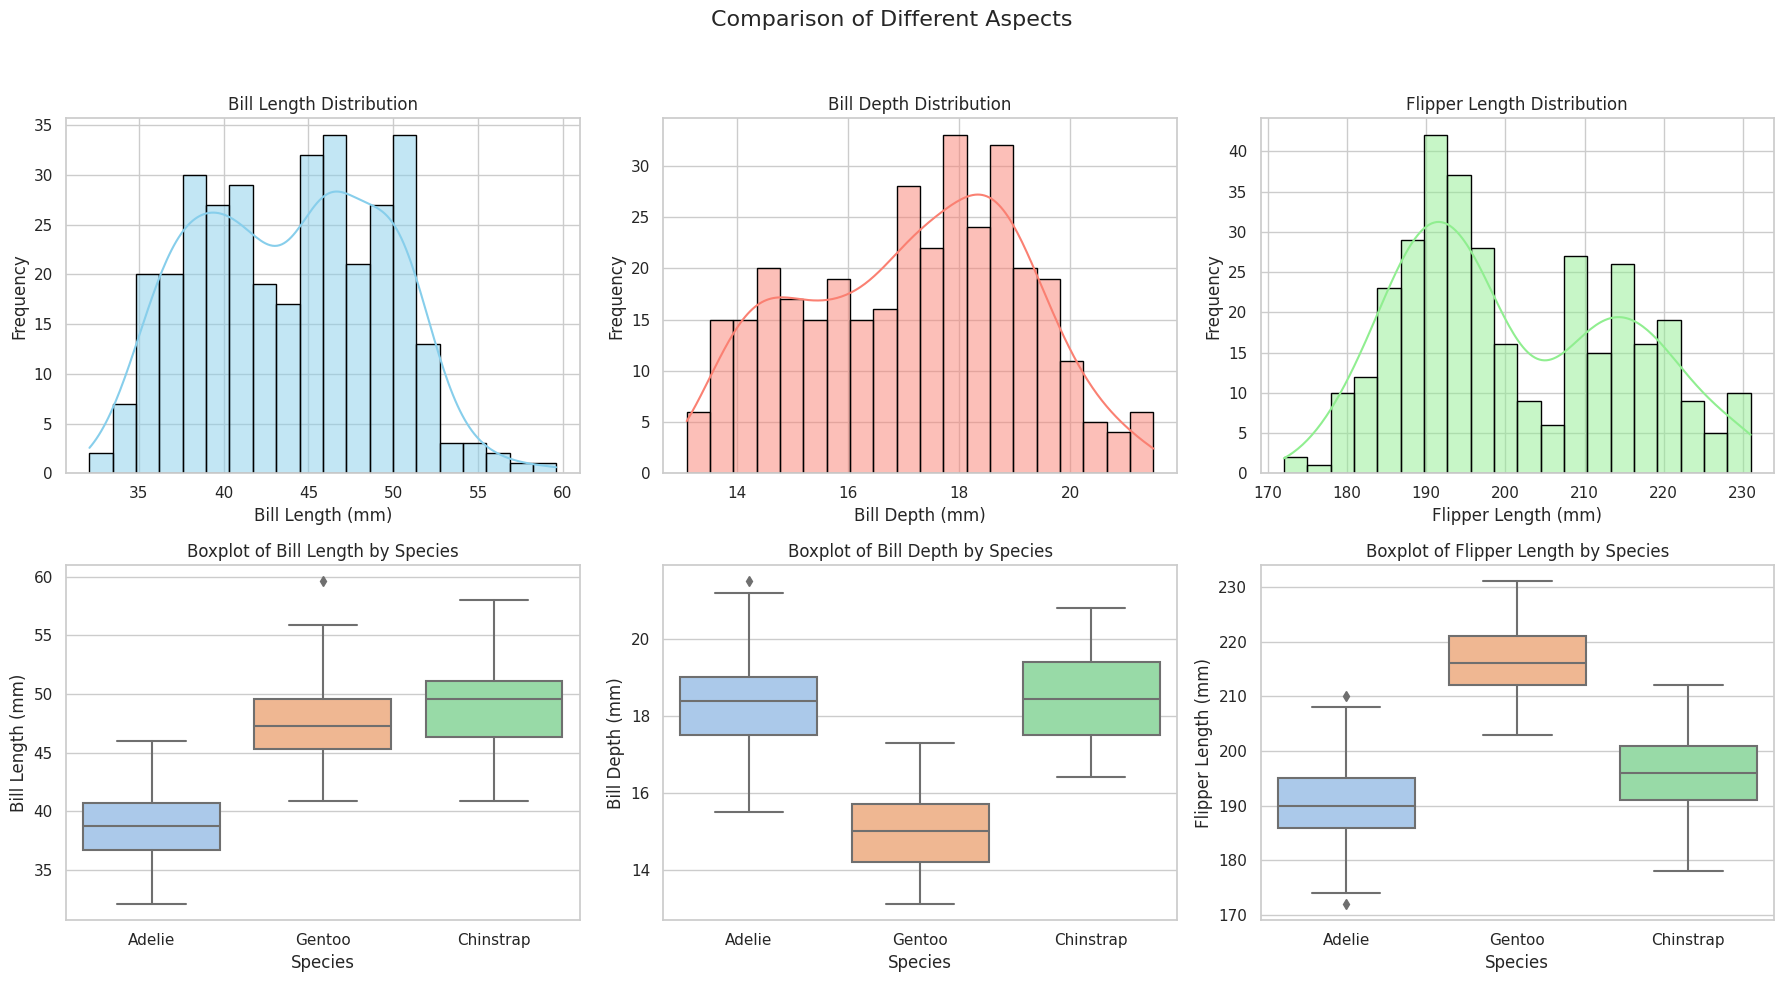

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Comparison of Different Aspects', fontsize=16)

# Histogram for Bill Length
sns.histplot(df['bill_length_mm'], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Bill Length Distribution')
axes[0, 0].set_xlabel('Bill Length (mm)')
axes[0, 0].set_ylabel('Frequency')

# Histogram for Bill Depth
sns.histplot(df['bill_depth_mm'], bins=20, kde=True, color='salmon', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Bill Depth Distribution')
axes[0, 1].set_xlabel('Bill Depth (mm)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for Flipper Length
sns.histplot(df['flipper_length_mm'], bins=20, kde=True, color='lightgreen', edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_title('Flipper Length Distribution')
axes[0, 2].set_xlabel('Flipper Length (mm)')
axes[0, 2].set_ylabel('Frequency')

# Boxplots for Measurements
sns.boxplot(x='species', y='bill_length_mm', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Boxplot of Bill Length by Species')
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Bill Length (mm)')

sns.boxplot(x='species', y='bill_depth_mm', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Boxplot of Bill Depth by Species')
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Bill Depth (mm)')

sns.boxplot(x='species', y='flipper_length_mm', data=df, ax=axes[1, 2], palette='pastel')
axes[1, 2].set_title('Boxplot of Flipper Length by Species')
axes[1, 2].set_xlabel('Species')
axes[1, 2].set_ylabel('Flipper Length (mm)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


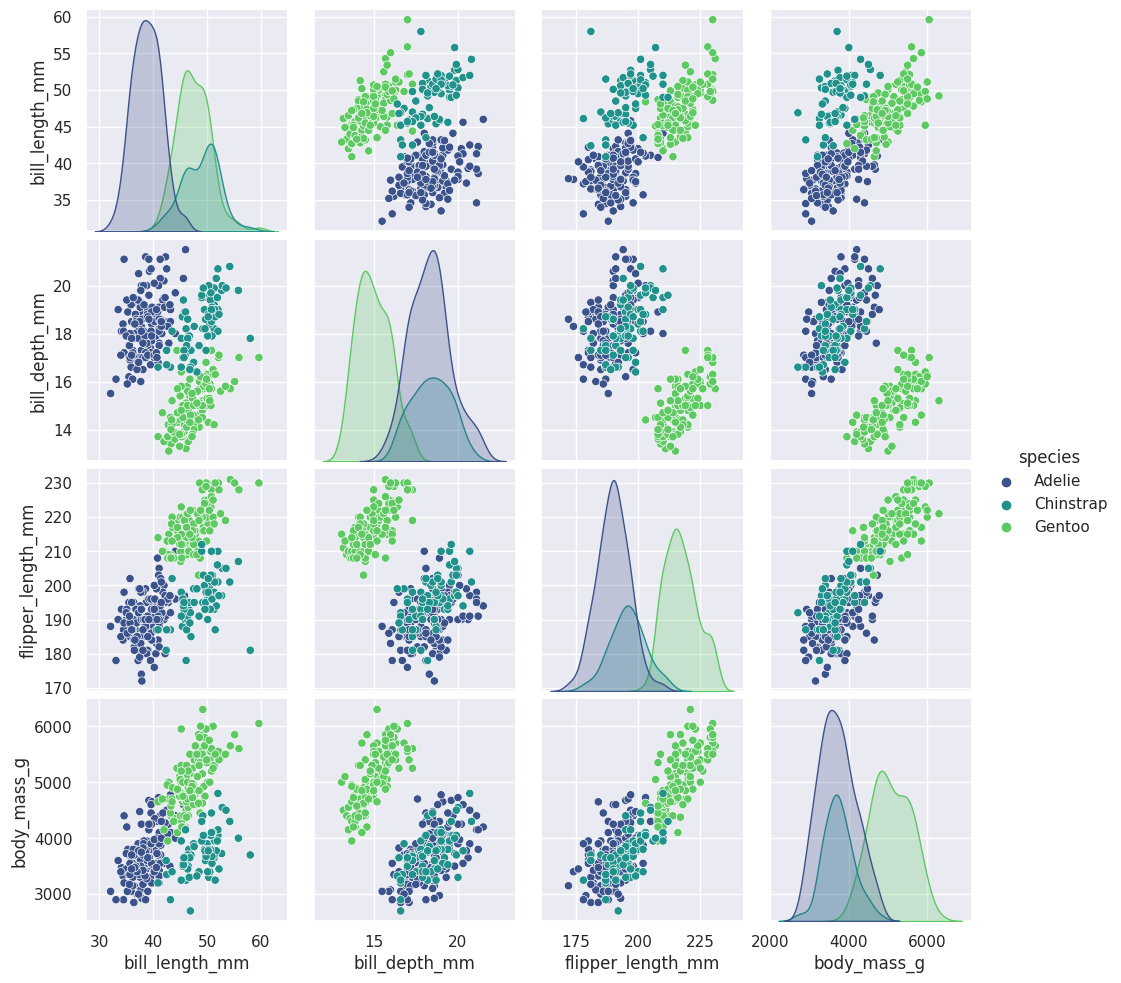

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df['species'] = df['species'].astype('category')
numerical_columns_with_species = numerical_columns + ['species']

sns.pairplot(df[numerical_columns_with_species], hue='species', palette='viridis', height=2.5)

plt.show()